# WeatherPy
----

### Analysis
* Weather is warmer near the equator. There is a stronger relationship in the northern hemisphere than the southern.
* Most cities have humidity over 60%, with a large number near 100%.
* There is no relationship between latitude and cloudiness, however there are very strong bands at 0, 20, 75 and 90 percents.
* Wind speed is not related to latitude, most cities have wind speeds below 10 mph.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



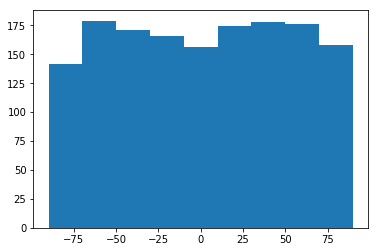

In [3]:
#Histogram to check equal distribution of latitudes
plt.hist(lats, bins=[-90,-70,-50,-30,-10,10,30,50,70,90])
plt.show()

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Split city list into groups of 60 (API limit 60 requests/min)
#Make timer so that api calls are delayed by one minute between groups

In [6]:
#city API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

#set city number/index for data frame and tracking
city_num = 0

#empty city dataframe
cities_df=pd.DataFrame(columns=["City","Date","Cloudiness","Temperature","Humidity","Wind speed","Latitude","Longitude"])
cities_df.head()

,City,Date,Cloudiness,Temperature,Humidity,Wind speed,Latitude,Longitude


In [7]:
#loop through city list
for city in cities:
    #make url with city name
    query_url = f"{base_url}{city}&APPID={api_key}&units=imperial"
    #make api request
    res = requests.get(query_url)
    #convert to json
    res = res.json()
    try:
        #add info to dataframe
        #data to gather:city name, date, cloudiness, temp, humidity, wind speed, lat, lng
        cities_df.loc[city_num,"City"] = res["name"]
        cities_df.loc[city_num,"Date"] = res['dt']
        cities_df.loc[city_num,"Cloudiness"] = res['clouds']['all']
        cities_df.loc[city_num,"Temperature"] = res["main"]["temp"]
        cities_df.loc[city_num,"Humidity"] = res["main"]["humidity"]
        cities_df.loc[city_num,"Wind speed"] = res['wind']['speed']
        cities_df.loc[city_num,"Latitude"] = res['coord']['lat']
        cities_df.loc[city_num,"Longitude"] = res['coord']['lon']
        print(f"Processing request {city_num} {city}")
        
        #add to city count/index
        city_num = city_num +1
            
        #check for time delay using remainder, delay on 60 sec intervals
        if np.mod(city_num,60) == 0:
            print("-------------")
            print("Search Paused")
            print("-------------")
            time.sleep(60)
            
    #if city not found
    except KeyError:
        print(f"Error {city} not found")
        
print("--------------")
print("Done Searching")
print("--------------")
            




Processing request 0 katsuura
Processing request 1 kindu
Processing request 2 margate
Processing request 3 khatanga
Processing request 4 saint-philippe
Processing request 5 ushuaia
Processing request 6 provideniya
Processing request 7 butaritari
Error taolanaro not found
Processing request 8 tsiroanomandidy
Processing request 9 boa vista
Processing request 10 rikitea
Processing request 11 tuatapere
Processing request 12 okha
Processing request 13 carnarvon
Error belushya guba not found
Processing request 14 new norfolk
Processing request 15 faanui
Processing request 16 morwell
Processing request 17 port blair
Processing request 18 barrow
Error tsihombe not found
Processing request 19 vaini
Processing request 20 port alfred
Processing request 21 vestmannaeyjar
Processing request 22 hobart
Processing request 23 kamyzyak
Processing request 24 mar del plata
Processing request 25 orocue
Processing request 26 camargo
Processing request 27 oistins
Processing request 28 bredasdorp
Processing r

Processing request 234 kushima
Processing request 235 neftcala
Error tabiauea not found
Processing request 236 komsomolskiy
Error umzimvubu not found
Error barentsburg not found
Processing request 237 zhigansk
Processing request 238 inirida
Processing request 239 alofi
-------------
Search Paused
-------------
Processing request 240 waingapu
Processing request 241 riyadh
Processing request 242 celestun
Processing request 243 dafeng
Processing request 244 rosetown
Processing request 245 garowe
Processing request 246 la crosse
Processing request 247 shangqiu
Processing request 248 cannock
Processing request 249 linxia
Processing request 250 chicama
Processing request 251 upington
Processing request 252 barcelos
Processing request 253 itoman
Processing request 254 pisco
Processing request 255 lata
Processing request 256 saint george
Processing request 257 brand-erbisdorf
Processing request 258 tera
Processing request 259 hue
Processing request 260 sunrise manor
Processing request 261 acap

Processing request 461 iqaluit
Processing request 462 araouane
Processing request 463 ewa beach
Processing request 464 torbay
Processing request 465 gurupi
Processing request 466 mamaku
Processing request 467 svetlaya
Processing request 468 sobolevo
Processing request 469 kirkenes
Processing request 470 miandoab
Processing request 471 samagaltay
Processing request 472 anadyr
Processing request 473 kozhanka
Processing request 474 tinskoy
Error navabad not found
Processing request 475 la grande
Processing request 476 gumdag
Error sembe not found
Processing request 477 okmulgee
Processing request 478 la ronge
Processing request 479 batagay-alyta
-------------
Search Paused
-------------
Processing request 480 jacareacanga
Processing request 481 muroto
Processing request 482 bucerias
Processing request 483 ancud
Error ye not found
Processing request 484 lovozero
Processing request 485 zheshart
Processing request 486 makat
Processing request 487 oktyabrskoye
Processing request 488 lagdo
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#check cities list
cities_df.head()

,City,Date,Cloudiness,Temperature,Humidity,Wind speed,Latitude,Longitude
0,Katsuura,1547955000,75,53.6,67,24.16,33.93,134.5
1,Kindu,1547955910,64,70.74,99,2.82,-2.95,25.92
2,Margate,1547953200,75,77,36,11.41,-43.03,147.26
3,Khatanga,1547955911,68,-11.34,74,7.96,71.98,102.47
4,Saint-Philippe,1547955300,90,-7.55,78,3.36,45.36,-73.48


In [9]:
#Make output data file
cities_df.to_csv(output_data_file, encoding = "utf-8")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

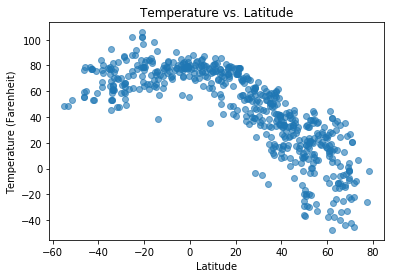

In [10]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Temperature"], alpha=.6)
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")
plt.show()

In [19]:
#save figure
plt.savefig("Latitude_vs_Temp.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

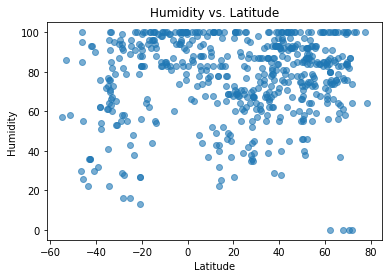

In [12]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], alpha=.6)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

In [20]:
#save the figure
plt.savefig("Latitude_vs_Humidity.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

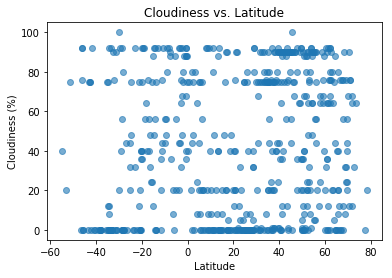

In [18]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], alpha=.6)
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

In [21]:
#save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

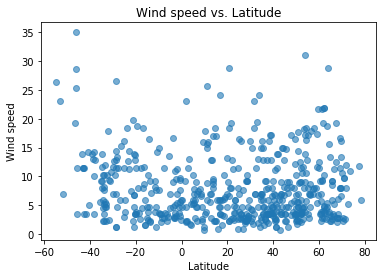

In [16]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Wind speed"], alpha=.6)
plt.title("Wind speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.show()

In [22]:
#save the figure
plt.savefig("Latitude_vs_Wind_speed.png")

<Figure size 432x288 with 0 Axes>